

## <span style="font-family:Copperplate Gothic"><u>Customer Segmentation To Define Marketing Strategy..</u></span> 

> ``Analyst Profile Information``
     
| Data Analyst Profile Information    :|                            | 
|---                     |---                                 |
|Person Name  →          |<b>Tejas Buradkar</b>             |
|E-Mail       →          |buradkartejas5@gmail.com           |
|Module type →           |Assign Tasks  |

---

> ### <span style="color:Blue">Summary & Busniess Statement</span>

`` Overview ``<br>
- [X] <b>You must create a consumer segmentation for this scenario in order to specify marketing strategy. About 9000 active credit card users usage patterns during the last six months are summarised in the sample dataset. The file contains 18 behavioural characteristics at the consumer level.</b>
> `` About The Dataset ``<br>

| Data Information   :|                            | 
|:---:                     |---                                 |
| <b>CUST_ID</b>  →         |Credit card holder ID            |
|<b>BALANCE</b>   →         |: Monthly average balance (based on daily balance averages)|
|<b>BALANCE_FREQUENCY</b> →        |Ratio of last 12 months with balance    |
|<b>PURCHASES</b> →           |Total purchase amount spent during last 12 months  |
|<b>ONEOFF_PURCHASES</b> →           |Total amount of one-off purchases  |
|<b>INSTALLMENTS_PURCHASES</b> →           |Total amount of installment purchases  |
|<b>CASH_ADVANCE</b> →           |Total cash-advance amount  |
|<b>PURCHASES_ FREQUENCY</b> →           |Frequency of purchases (Percent of months with at least one purchase)  |
|<b>ONEOFF_PURCHASES_FREQUENCY</b> →           |Frequency of one-off-purchases   |
|<b>PURCHASES_INSTALLMENTS_FREQUENCY</b> →           |Frequency of installment purchases  |
|<b>CASH_ADVANCE_ FREQUENCY</b> →           |Cash-Advance frequency  |
|<b>AVERAGE_PURCHASE_TRX</b> →           |: Average amount per purchase transaction  |
|<b>CASH_ADVANCE_TRX</b> →           |Average amount per cash-advance transaction  |
|<b>PURCHASES_TRX</b> →           |Average amount per purchase transaction  |

> `` Objective / Goal / Aim / Target ``<br>
 
- [X] Advanced data preparation: 
    - [X] Monthly average purchase and cash advance amount
    - [X] Purchases by type (one-off, installments) 
    - [X] Average amount per purchase and cash advance transaction
    - [X] Limit usage (balance to credit limit ratio)
    - [X] Payments to minimum payments ratio etc (think of more types of similar analysis)
- [X] Advanced reporting:
    - [X] Use the derived KPIs to gain insight on the customer profiles.
- [X] Identification of the relationships/ affinities between services.
- [X] Clustering: 
    - [X] Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm <br>to reveal the behavioral segments of credit card holders Identify cluster characteristics of the cluster using detailed profiling.
- [X] Provide the strategic insights and implementation of strategies for given set of cluster characteristics.

> ### <span style="color:Navy">Requried Library Imported..</span>

In [1]:
# data manipulation libray.
import pandas as pd
import numpy as np

# EDA library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data preparation Library 
from sklearn.preprocessing import Normalizer, StandardScaler

# Machine Learning Library
from sklearn.cluster import KMeans
from sklearn import metrics

# evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# some Helping Function for Better Analysis
pd.set_option('display.max_columns', 70)
pd.set_option("display.max_colwidth", 70)

> ### <span style="color:Navy">Dataset Loaded..</span>

In [2]:
df = pd.read_csv("./Data_problem  1.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


> ### <span style="color:Navy">Descriptive Analysis..</span>

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", df.isnull().sum().values.sum())
df.isnull().sum()     # we Have NAN values in Minimum Payments Columns.


Missing values :   314


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Print The Unique Number Values 
print('\n Number Of Unique Values  :- \n', df.nunique()) 


 Number Of Unique Values  :- 
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


- [X] Finding the what number of data percenteage is missing in our dataset..

In [7]:
total_number = df.isnull().sum(axis=0).sort_values(ascending=False)
total_percent = ((df.isnull().sum(axis=0)/df.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
search = pd.concat([total_number, total_percent], axis=1, keys=['Total', 'Percent(%)'])
search.head(20)

,Total,Percent(%)
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173
CUST_ID,0,0.000000
BALANCE,0,0.000000
PRC_FULL_PAYMENT,0,0.000000
PAYMENTS,0,0.000000
PURCHASES_TRX,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


### <span style="color:navy">Looking After Dataset..</span>
<div class="alert alert-block alert-info">
<b>Note:<br></b>
    1 . In this dataset total Row is 8950 and columns is 18<br>
    2 . There are some misssing values /NAN values are there.<br>
    3 . All The 18 variable is holding the numberical Data<br>
    4 . 3 % Of data missing in our (MINIMUM PAYMENT COLUMNS).
    </div>

### <span style="color:navy">Data Pre-Processing..</span>
     - Checking the Normality and Kurtosis (Data Dispersion)

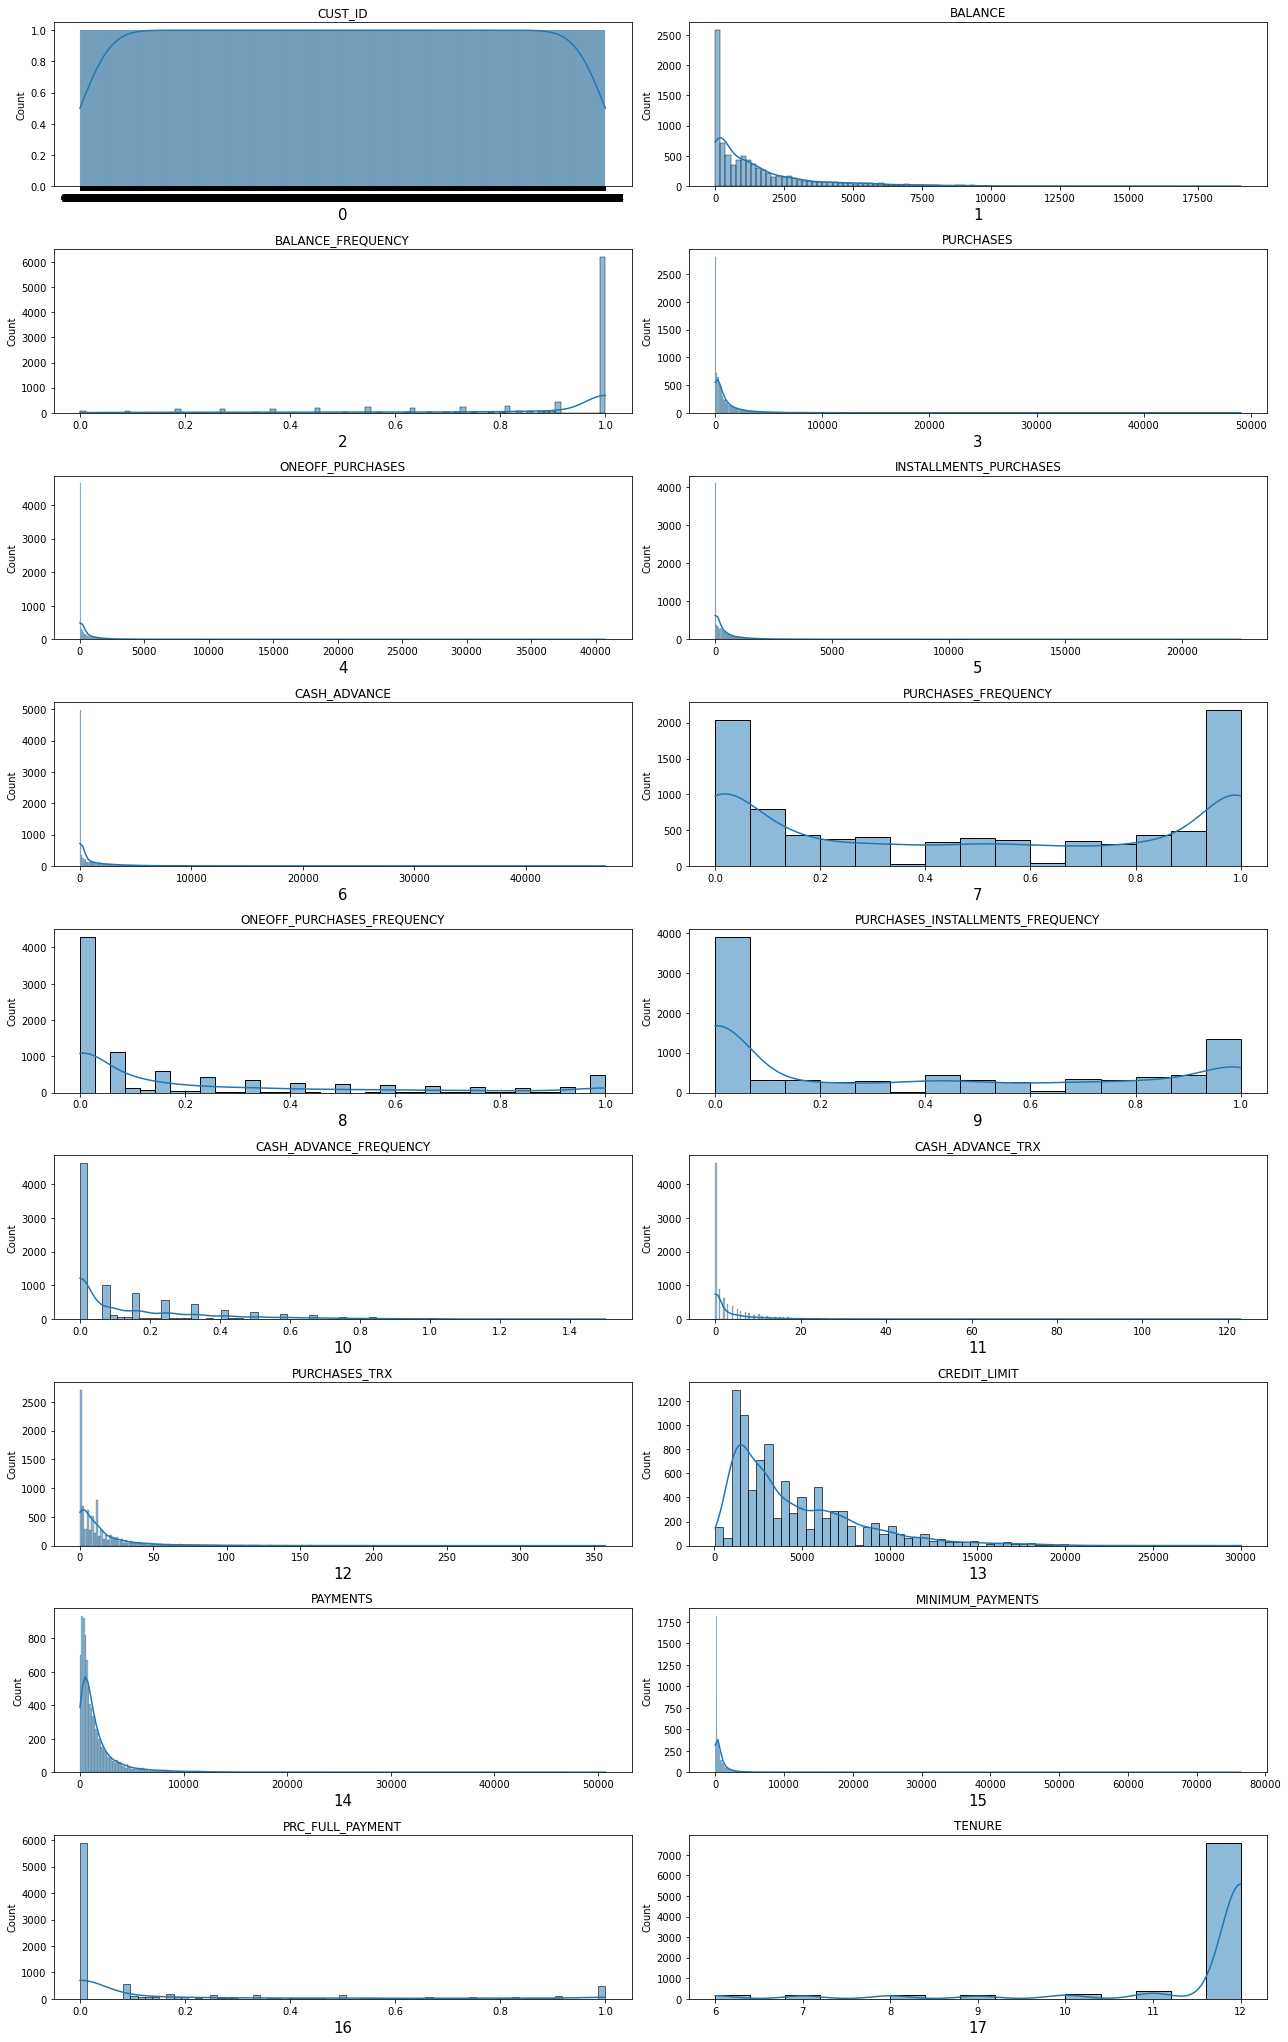

In [8]:
c = 1
# sets the plot size
plt.figure(figsize=(18, 50))

# plots a distribution for each feature 
for i in range(len(df.columns)):
    plt.subplot(16, 2,c)
    sns.histplot(df[df.columns[i]],kde=True)
    c = c +1 
    plt.xlabel(i,fontsize = 15)
    plt.title(df.columns[i])

# adjusts the layout    
plt.tight_layout()
plt.show()

### <span style="color:Blue"> Insight From Dataset </span>
- [X] Most consumers have regular updates to their balance frequency.
- [X] There are two distinct customer groups that differ in terms of purchasing frequency.
- [X] Most customers don't usually make one-time purchases or payments in instalments.
- [X] Most consumers do not pay in advance with cash.
- [X] Most clients have been with us for more than 11 years.

In [9]:
print("Median Values of credit limt :- ",df['CREDIT_LIMIT'].median())
print("Median Values of minimum payments :- ",df['MINIMUM_PAYMENTS'].median())

Median Values of credit limt :-  3000.0
Median Values of minimum payments :-  312.343947


In [10]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [11]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

>### <span style="color:Blue"> Advanced data preparation :- customer profile by deriving </span>

######  1 .Monthly average purchase and cash advance amount

In [12]:
df['Monthly_avg_purchase'] = df['PURCHASES']/df['TENURE']

In [13]:
print("Our Monthly Average Purchase :- \n",df['Monthly_avg_purchase'].head())
print("Our Tenure :- \n", df['TENURE'].head())
print("Our Purchase :- \n",df['PURCHASES'].head())

Our Monthly Average Purchase :- 
 0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64
Our Tenure :- 
 0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64
Our Purchase :- 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


###### Monthly_cash_advance Amount

In [14]:
df['Monthly_cash_advance']=df['CASH_ADVANCE']/df['TENURE']

In [15]:
df['Monthly_cash_advance'].head(10)

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
Name: Monthly_cash_advance, dtype: float64

In [16]:
df[df['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

#### 2- Purchases by type (one-off, installments)

- To find what type of purchases customers are making on credit card

In [17]:
type_purchases = df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

In [18]:
type_purchases

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


> #### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [19]:
def purchase(df):
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [20]:
df['purchase_type']=df.apply(purchase,axis=1)

In [21]:
df['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

>#### 4. Limit_usage (balance to credit limit ratio ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [22]:
df['limit_usage']=df.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [23]:
df['limit_usage'].sample(10)

6522    0.003903
4586    0.020159
3557    0.058046
1436    0.449314
2273    0.867700
3045    0.624777
1551    0.721710
1157    0.004277
633     0.711504
3489    1.011031
Name: limit_usage, dtype: float64

> #### 5- Payments to minimum payments ratio etc.

In [24]:
df['payment_minpay']=df.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [25]:
df['payment_minpay'].head(5)

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_minpay, dtype: float64

- [X] in this dataset there are outliear so i am performing the log transformation  on the dataset to remove the outliear effect and also some columns which are not needed

In [26]:
df_log=df.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [27]:
df_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [28]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=df_log[[x for x in df_log.columns if x not in col ]]

In [29]:
pd.DataFrame(cr_pre.columns)

,0
0,BALANCE_FREQUENCY
1,ONEOFF_PURCHASES
2,INSTALLMENTS_PURCHASES
3,PURCHASES_FREQUENCY
4,ONEOFF_PURCHASES_FREQUENCY
5,PURCHASES_INSTALLMENTS_FREQUENCY
6,CASH_ADVANCE_FREQUENCY
7,CASH_ADVANCE_TRX
8,PURCHASES_TRX
9,Monthly_avg_purchase


In [30]:
pd.DataFrame(df_log.columns)

,0
0,BALANCE
1,BALANCE_FREQUENCY
2,PURCHASES
3,ONEOFF_PURCHASES
4,INSTALLMENTS_PURCHASES
5,CASH_ADVANCE
6,PURCHASES_FREQUENCY
7,ONEOFF_PURCHASES_FREQUENCY
8,PURCHASES_INSTALLMENTS_FREQUENCY
9,CASH_ADVANCE_FREQUENCY


>### Insights from KPIs

•	Advanced reporting: Use the derived KPIs to gain insight on the customer profiles

In [31]:
x=df.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

> #### customers with installment purchases are paying dues 

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

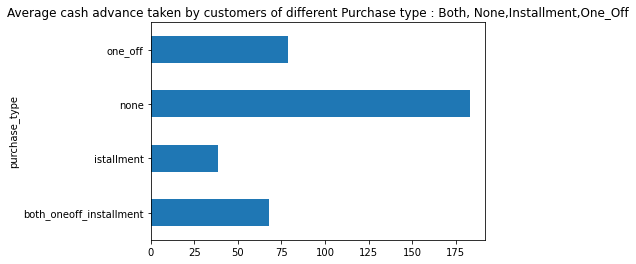

In [32]:
df.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

>#### Customers who don't do either one-off or installment purchases take more cash on advance

<AxesSubplot:ylabel='purchase_type'>

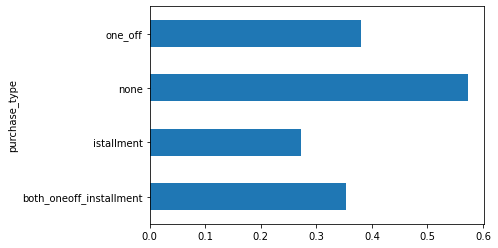

In [33]:
df.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

>#### Original dataset with categorical column converted to number type.

In [34]:
cre_original=pd.concat([df,pd.get_dummies(df['purchase_type'])],axis=1)

In [35]:
cre_original

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay,both_oneoff_installment,istallment,none,one_off
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,istallment,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,istallment,0.028494,6.660231,0,1,0,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,50.000000,0.000000,istallment,0.019183,0.883197,0,1,0,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,istallment,0.023399,0.986076,0,1,0,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,none,0.026915,0.942505,0,0,1,0


> ### <span style="color:Navy">Make Model Preparation..</span>

***We do have some categorical data which need to convert with the help of dummy creation (One hot Encoding)***

In [36]:
cr_pre['purchase_type']=df.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

C:\Users\burad\AppData\Local\Temp\ipykernel_14664\3377137149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_pre['purchase_type']=df.loc[:,'purchase_type']


,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


-  Now i am Merging the to with created dummy to original dataset

In [37]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [38]:
cr_dummy

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,istallment,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.693147,0.000000,5.677165,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.902377,0.000000,0.028095,2.036042,istallment,0,1,0,0
8946,0.693147,0.000000,5.707110,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.931826,0.000000,0.019002,0.632971,istallment,0,1,0,0
8947,0.606136,0.000000,4.979489,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,3.221539,0.000000,0.023129,0.686161,istallment,0,1,0,0
8948,0.606136,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,0.000000,1.959127,0.026559,0.663978,none,0,0,1,0


In [39]:
# Now we are Dropping the Purchase type columns because of we created the dummy data and merge it
l=['purchase_type']
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
istallment                          False
none                                False
one_off                             False
dtype: bool

> #### <span style="color:Navy">Identification of the relationships/ affinities between services...</span>

In [40]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692,0.179711,0.475431,0.503557,-0.039446
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776,0.131281,0.086020,0.404661,-0.089272
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288,0.995845,-0.055473,-0.057409,0.016731
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150,0.913060,-0.034545,-0.042212,0.010301
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143,0.677024,-0.067782,-0.058264,0.020621
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312,-0.047502,0.976364,0.215199,-0.003378
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506,0.395337,-0.215786,-0.201782,0.011407
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466,0.499711,-0.089034,-0.092007,-0.004550
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275,0.314136,-0.179333,-0.161420,0.017921
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372,-0.116109,0.628312,0.360131,-0.021863


C:\Users\burad\AppData\Local\Temp\ipykernel_14664\3607705315.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


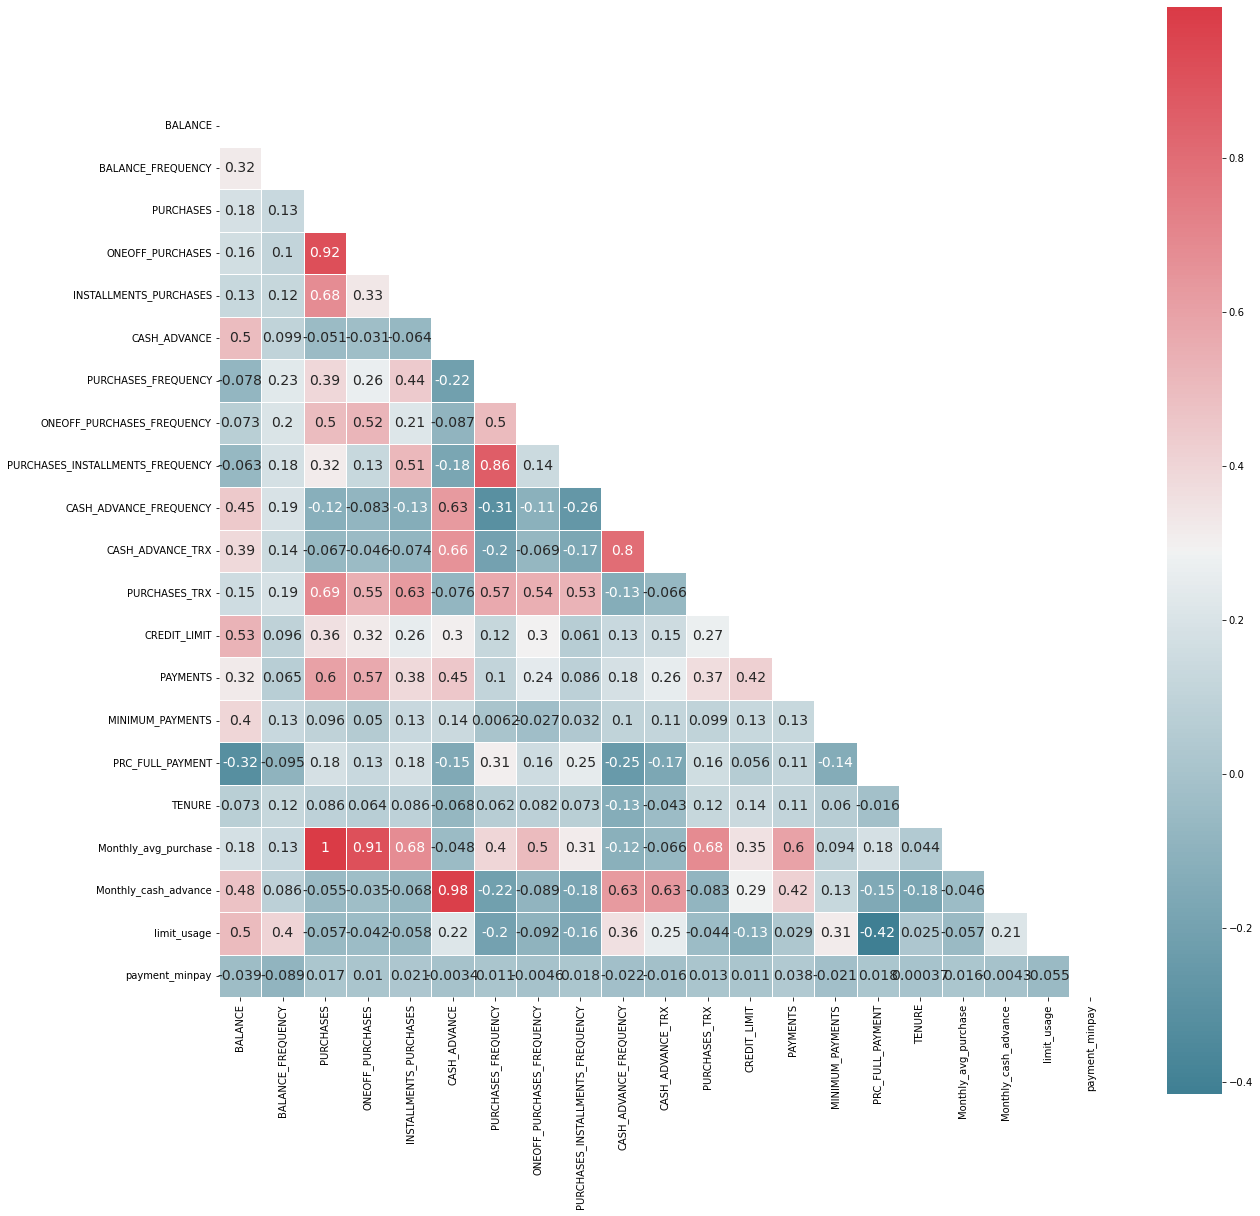

In [41]:
# calculates the correlations
correlation = df.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

`` Info``

- [X] Very strong correlations:
    - [x] One off purchases with Purchases
    - [x] Purchases intallments frequency with Purchases frequency
    - [x] Cash in advance transactions with Cash in advance frequency
    - [x] Purchases with Purchases transactions
- [X] Medium correlations:
    - [X] Balance with Cash in advance
    - [X] Balance with Cash in advance frequency
    - [X] Balance with Credit limit
- [X] Relatively medium:
    - [X] Payments with Purchases transactions
    - [X] Payments with Credit limit

> #### <span style="color:Navy">Standardrizing data...</span>

- [X] we will standardize data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

In [42]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()

In [43]:
cr_scaled=sc.fit_transform(cr_dummy)

In [44]:
cr_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249]])

> #### <span style="color:Navy">Implemented the  Principal Component Analysis...</span>
•	Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioral segments of credit card holders

In [45]:
from sklearn.decomposition import PCA

In [46]:
cr_dummy.shape

(8950, 17)

In [47]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

**Lets check if we will take 17 component then how much varience it explain. Ideally means it should be 1 i.e 100%**

In [48]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

1.0

In [49]:
print(" Let see the Our Explaining the varinace")
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)
    
print('Done Check it......')

 Let see the Our Explaining the varinace
Done Check it......


In [50]:
var_ratio    # we getting that from 6 components are explaining about 90% variance so we select 5 components

{2: 0.5826439793960289,
 3: 0.7299379309512691,
 4: 0.8115442762351253,
 5: 0.8770555795291423,
 6: 0.918649244351261,
 7: 0.9410925256030126,
 8: 0.961611405368307,
 9: 0.9739787081990647,
 10: 0.9835896584630707,
 11: 0.9897248107341958,
 12: 0.992755000913524,
 13: 0.9953907562385433,
 14: 0.9979616898169594,
 15: 0.9996360473172955,
 16: 1.0,
 17: 1.0}

In [51]:
pc=PCA(n_components=6)
p=pc.fit(cr_scaled)

In [52]:
print(cr_scaled.shape)
print(p.explained_variance_)
np.sum(p.explained_variance_)

(8950, 17)
[6.83574755 3.07030693 2.50427698 1.38746289 1.1138166  0.70717132]


15.618782269308774

- Now plotting the graph to see more clarly..

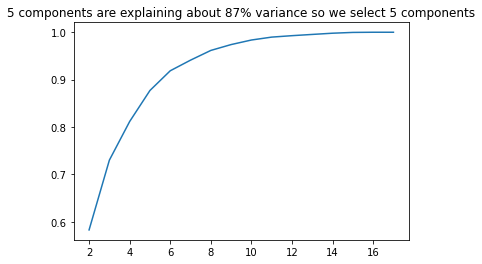

In [53]:
pd.Series(var_ratio).plot()
plt.title('5 components are explaining about 87% variance so we select 5 components')
plt.show()

- Now we selected the 6 components

In [54]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [55]:
data=pd.DataFrame(reduced_cr)

In [56]:
data.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


In [57]:
col_list=cr_dummy.columns
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'istallment', 'none', 'one_off'],
      dtype='object')

In [58]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


> NOTE 

**We see hear after apply the PCA(principle componenet analysis) So initially we had 17 variables now its 5 so our variable go reduced**

In [59]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

> #### <span style="color:Navy">CLUSTERING</span>

I'm starting with 4 clusters based on my understanding about the types of purchases that consumers make and the specific behaviour that they display dependent on the purchase type (as seen above in Insights from KPI).

In [60]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_cr)

KMeans(n_clusters=4, random_state=123)

In [61]:
km_4.labels_

array([2, 1, 0, ..., 2, 1, 0])

> #### <span style="color:Navy">Finding  The Optimal K Value</span>

         here we don't know the optimal K value, which will give the desire result which we are excepting from.
         so there is one method that method name is to find the optimal k value " METHOD: ELBOW METHOD"
         
         This elow mothod try to find the optimal value

 #### <span style="color:Navy">Catching the Error</span>

In [62]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here

In [63]:
print('Printing  The Error:-')
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

Printing  The Error:-


,num_clusters,cluster_errors
0,1,139772.482528
1,2,93308.065861
2,3,70745.193400
3,4,49446.066485
4,5,42548.605568
5,6,37713.045270
6,7,34124.456465
7,8,31164.894649
8,9,28865.956653
9,10,26304.074929


Text(0.5, 1.0, 'Elbow Method Optimal Values')

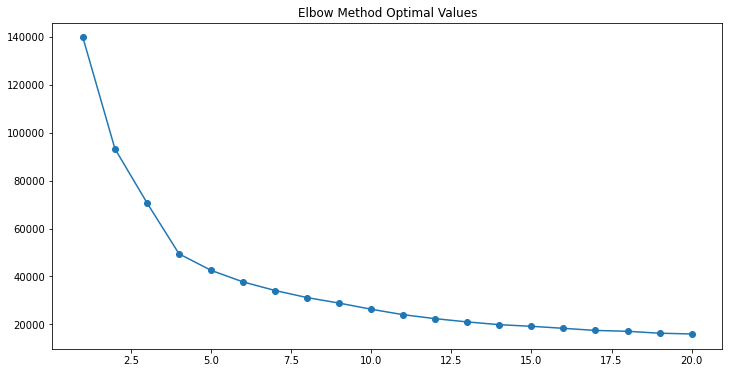

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title('Elbow Method Optimal Values')

- [X] We clearly getting to see that optimal value is start from 4,5, 6

 #### <span style="color:Navy">Evaluting Metrices</span>
 
     Silhouette Coefficient

In [65]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

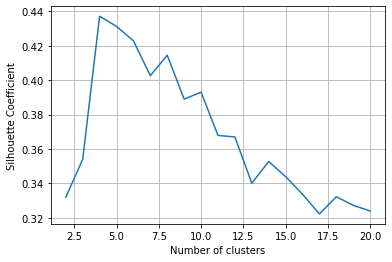

In [66]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

- the Silhouette score, it is bounded between -1 and 1, so if the cluster gets a positive value this is a good sign. Closer to -1 suggests incorrect clustering, while closer to +1 shows that each cluster is very dense.



 #### <span style="color:Navy">pairwise relationship of components on the data</span>

In [67]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [68]:
df_pair_plot['Cluster']=km_4.labels_ #Add cluster column in the data frame

In [69]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,2
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,0
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,0
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,0


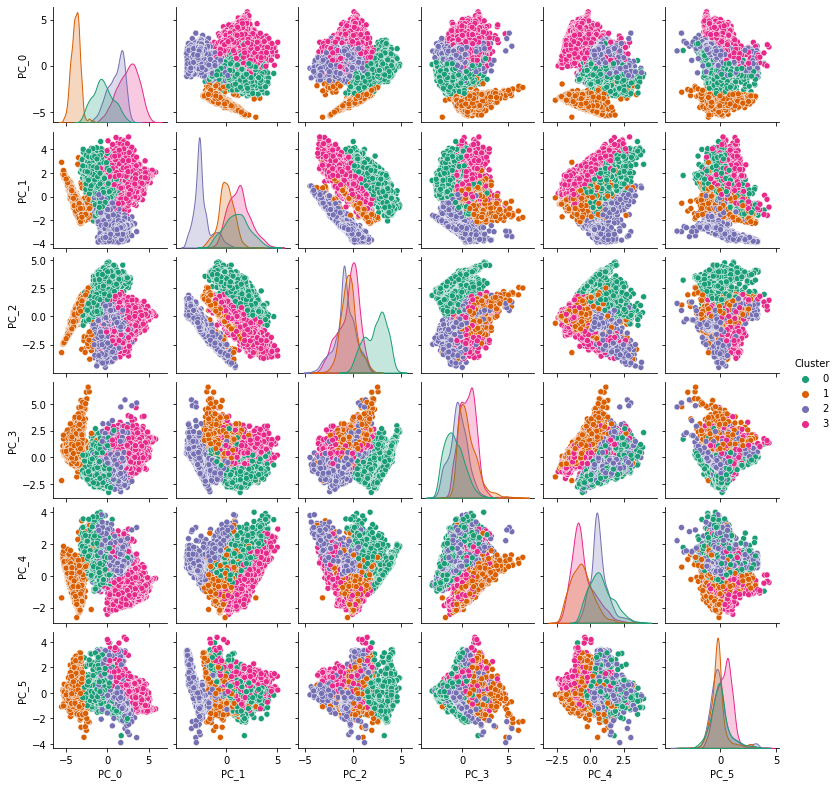

In [70]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

 #### <span style="color:Navy">NOTE:-</span>
 
It demonstrates that the first two components can identify clusters.

Now that the principle component has been completed, we must bring our original data frame so that we can combine the cluster with it.
We must use our data frame in order to interpret the results.

 #### <span style="color:Navy">Analyzing the values:-</span>
 
- Now we have the value of each of the 17 attributes of the 5 clusters. We'll observe the variance of the centroids for a given attribute, that is, we'll collect an attribute and check how it behaves in different clusters.

- As we'll analyze the variance, we'll look for an attribute that the values differ between the clusters, as this will increase the chance of observing the particularities of each group.

- Those attributes that have the greatest variance will be the ones used for our analysis.

In [71]:
# gets the centroids
centroids = clusters.cluster_centers_

In [72]:
# printing a sample of centroids
print(centroids[:, 0])
print(centroids[:, 1])
print(centroids[:, 2])

[-1.89954157  1.86820603  2.69196343 -3.72875448 -0.45264893  0.74189726
 -0.03174374  0.18147546 -0.3624412  -1.46695832  3.74629779 -3.39286072
  0.97798268  1.90137727  0.79775307  1.28492872 -4.49102447 -3.61286372
  1.90155844 -0.77195884]
[ 2.73647675 -2.57657377  0.966275   -0.19695543  0.47621641  2.05439395
  0.05849182 -3.43140341 -0.63347361  1.65760552  1.09671549 -1.3170452
 -2.90205574  0.00683253 -2.04724262  1.38389028  0.80275435 -0.24334614
  3.01057908 -0.83556361]
[ 0.53383225 -0.96351093 -0.46260503 -0.37929643  2.51314776 -1.74500859
  3.49996881  0.84774017 -2.56854494  1.33400696  0.14367125  1.00103678
 -0.03227918  0.49714951 -1.32755748  2.94061136 -1.3006302  -0.03506935
 -1.9830637   3.58717821]


In [73]:
# gets the max number of attributes
max_att = len(centroids[0])
feature_name = []
centroid_var = []

# calculates the variance for each feature centroid
for i in range(max_att):
    feature_name.append(df.columns.values[i])
    centroid_var.append(centroids[:, i].var())

# creates a DataFrame for better visualization
df_feat_cent_vars = pd.DataFrame({'feature_name': feature_name, 'centroid_var':centroid_var})
df_feat_cent_vars.sort_values(by='centroid_var', ascending=False)

,feature_name,centroid_var
0,CUST_ID,5.015650
1,BALANCE,3.120231
2,BALANCE_FREQUENCY,3.029521
3,PURCHASES,1.166376
4,ONEOFF_PURCHASES,0.879025
5,INSTALLMENTS_PURCHASES,0.575244


In [74]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [75]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [76]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [77]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.127341,0.043582,12.062050,33.013723
Monthly_avg_purchase,69.875917,0.148297,47.626256,193.008043
Monthly_cash_advance,78.098613,186.281319,33.550080,67.466910
limit_usage,0.379761,0.576076,0.264745,0.353591
CASH_ADVANCE_TRX,2.881220,6.540230,1.021133,2.804261
payment_minpay,5.573672,9.936617,13.422420,7.245651
both_oneoff_installment,0.000535,0.001916,0.000000,1.000000
istallment,0.000000,0.017241,1.000000,0.000000
one_off,0.999465,0.002874,0.000000,0.000000
none,0.000000,0.977969,0.000000,0.000000


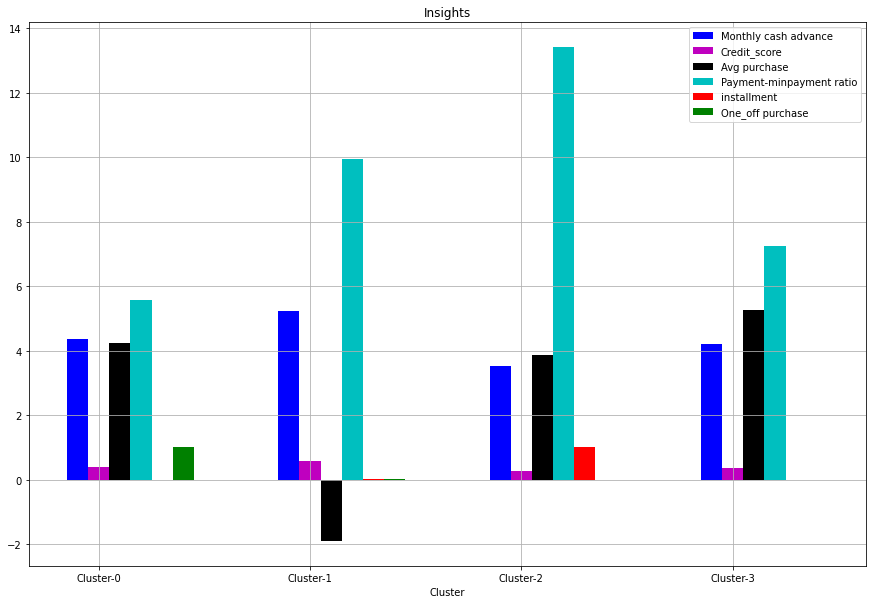

In [79]:
# Creating the graph to understand the behaviour with customer....
# Draw the plot size
fig,ax=plt.subplots(figsize=(15,10))
plt.grid(True)
# index
index=np.arange(len(cluster_4.columns))

# Tracking the All Values 
cash_advance = np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score = (cluster_4.loc['limit_usage',:].values)
purchase     =  np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment      =  cluster_4.loc['payment_minpay',:].values
installment  =  cluster_4.loc['istallment',:].values
one_off      =  cluster_4.loc['one_off',:].values

# Creating the Bar
bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)


# Giving the Labeling...
plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cluster-0', 'Cluster-1', 'Cluster-2', 'Cluster-3'))
plt.legend()
plt.show()

 #### <span style="color:Navy">Insight:-</span>
 #### Clusters are clearly distinguishing behavior within customers
 - [x] Customers in Cluster 2 have a relatively strong credit score, the highest Monthly avg purchases, and they make both instalment and one-time purchases. **This category makes up around 31% of all customers**.
 
 - [x] Cluster 1 is using the most advance cash while making the bare minimum payment, has bad credit, and doesn't make any purchases. **About 23% of the total customer base belongs to this group.**
 
 - [x] Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. **This group is about 21% of the total customer base**
 - [x] Customers in Cluster 3 make up roughly 25% of the overall customer base, have the highest credit scores, pay the most in dues, and make the most instalment purchases.
 

 #### <span style="color:Navy">Finding behaviour with 5 Clusters::-</span>
 

In [80]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([4, 2, 0, ..., 4, 2, 0])

In [81]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [82]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5').apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,7.096670,34.587759,0.032196,27.703746,11.905537
Monthly_avg_purchase,68.917645,210.536468,0.086126,141.584086,47.369817
Monthly_cash_advance,74.517541,4.040708,185.038534,249.942101,20.636870
limit_usage,0.377959,0.258931,0.576110,0.600096,0.250011
CASH_ADVANCE_TRX,2.697637,0.152757,6.448823,10.384790,0.550489
payment_minpay,5.562287,8.675499,9.963172,3.651686,13.783426
both_oneoff_installment,0.002148,1.000000,0.000000,0.900114,0.000000
istallment,0.000000,0.000000,0.015858,0.088536,1.000000
one_off,0.997852,0.000000,0.002883,0.011351,0.000000
none,0.000000,0.000000,0.981259,0.000000,0.000000


 #### <span style="color:Navy">Finding behaviour with 6 Clusters::-</span>

In [83]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([2, 1, 5, ..., 2, 1, 3])

In [84]:
cluster_df_6 = pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [85]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,34.663789,0.030347,11.905537,5.958512,27.919908,7.764159
Monthly_avg_purchase,211.196582,0.088891,47.369817,53.845679,140.374727,78.709899
Monthly_cash_advance,4.027720,184.829434,20.636870,205.688263,242.856971,3.664199
limit_usage,0.258206,0.575724,0.250011,0.606140,0.600654,0.245953
CASH_ADVANCE_TRX,0.150838,6.434971,0.550489,7.652361,10.000000,0.125951
payment_minpay,8.702974,9.976487,13.783426,3.259302,3.616973,6.907951
both_oneoff_installment,1.000000,0.000000,0.000000,0.000000,0.911899,0.006762
istallment,0.000000,0.016378,1.000000,0.000000,0.088101,0.000000
one_off,0.000000,0.000000,0.000000,1.000000,0.000000,0.993238
none,0.000000,0.983622,0.000000,0.000000,0.000000,0.000000


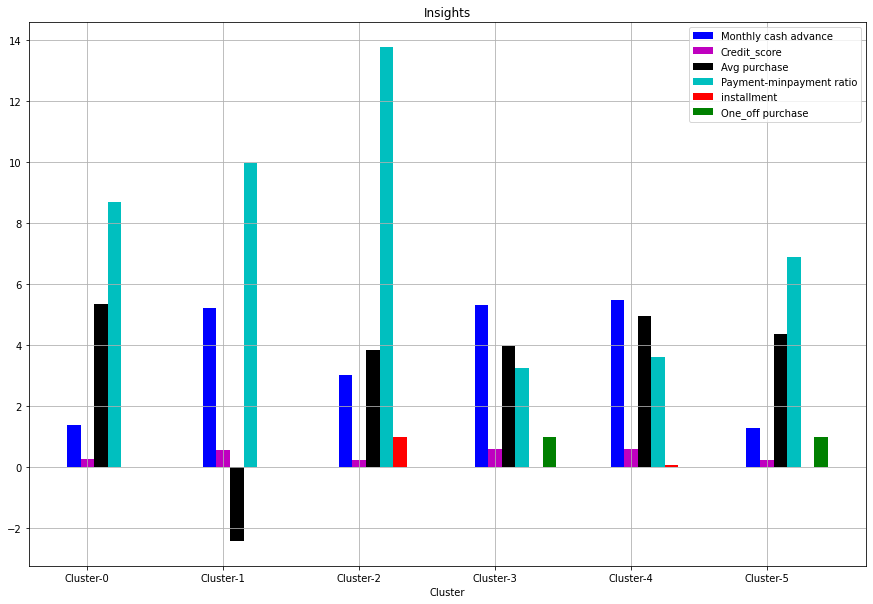

In [86]:
# Creating the graph to understand the behaviour with customer....
# Draw the plot size
fig,ax=plt.subplots(figsize=(15,10))
plt.grid(True)
index=np.arange(len(six_cluster.columns))

# Tracking the All Values 
cash_advance    = np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score    = (six_cluster.loc['limit_usage',:].values)
purchase        = np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment         = six_cluster.loc['payment_minpay',:].values
installment     = six_cluster.loc['istallment',:].values
one_off         = six_cluster.loc['one_off',:].values

# Creating the Bar
bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

# Giving the Labeling...
plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cluster-0', 'Cluster-1', 'Cluster-2', 'Cluster-3','Cluster-4','Cluster-5'))

plt.legend()

 #### <span style="color:Navy">Evaluting The Model :-</span>

In [87]:
from sklearn.metrics import calinski_harabasz_score,silhouette_score
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabasz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

<AxesSubplot:>

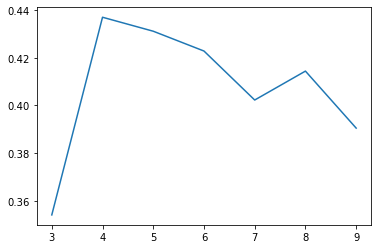

In [88]:
pd.Series(score).plot()


<AxesSubplot:>

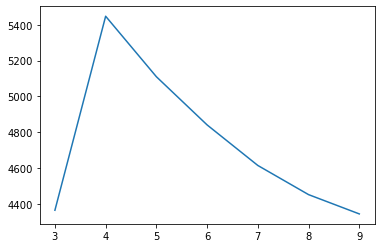

In [89]:
pd.Series(score_c).plot()

 #### <span style="color:Navy">According to the performance Metraces:-</span>


***Insights with 4 Clusters***



- Customers in Cluster 2 have a relatively strong credit score, the highest Monthly avg purchases, and they make both instalment and one-time purchases. **This category makes up around 31% of all customers**.
 

 
- Cluster 1 is using the most advance cash while making the bare minimum payment, has bad credit, and doesn't make any purchases. **This category makes up around 23% of all customers.**



- Customers in Cluster 0 conduct the majority of one-time transactions, have the lowest payment ratio, and have poorer credit scores. **This category makes up around 21% of all customers.**


- Customers in Cluster 3 have the highest credit scores, pay the most in dues, and make the most instalment purchases. **This category makes up around 25% of all customers**.






 #### <span style="color:Navy">Marketing Strategy Suggested::-</span>
 
> After doing all operation understanding the data my marketing strategy suggested are:- <br>
    
- [X] Group 2
    - [x] They are possible target consumers who pay their bills on time, make purchases, and keep a respectable credit score; we can raise credit limits or cut interest rates for them. To boost transactions, premium cards or loyalty cards may be provided
    



- [X] Group 1
    - [X] They only accept cash in advance and have a bad credit rating. By offering a lower lending rate on purchases, we can specifically target them.

- [X] Group 0
    - [X] This group uses cards infrequently and only for one-time purchases (may be for utility bills only). This group appears to be dangerous.

    
- [X] Group 3
    - [X] This organisation is performing the best out of all thanks to its customers' high credit standing and prompt payment of invoices. — Giving them points will encourage them to make more purchases..
    
